In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime
import tensorflow as tf

warnings.filterwarnings("ignore")
%load_ext tensorboard

### Cleaned data is saved to a new csv file so that we don't have to run all these cleaning codes all the time.

In [ ]:
# df = pd.read_csv('2020-4-27.csv')
# df.head()

In [ ]:
# df.info()

In [ ]:
# null_counts = df.isnull().sum()
# null_counts

In [ ]:
# # calulate number of missing values for area and build area
# def count_na_values(column):
#     count = 0
#     for value in column:
#         if "N/A" in str(value):
#             count += 1
#     return count
# na_counts = df[['Area','Build Area']].apply(count_na_values)
# print(na_counts)

In [ ]:
# sel_cols = ['Address','City','Bedroom','Bathroom','Parking','Face','Views','Area','Road Width','Road Type']
# X = df[sel_cols].copy()
# y = df['Price']
# # print(X.tail())
# # print(y)

In [ ]:
# # keep the middle values of the address columns only
# X['Address'] = X['Address'].str.split(',').str[1]
# # print(X['Address'])

In [ ]:
# #convert views like 1k to 1000
# def convert_views_to_numeric(value):
#     if 'K' in value:
#         return float(value.replace('K', '')) * 1000
#     else:
#         return float(value)

# X['Views'] = X['Views'].apply(convert_views_to_numeric)
# # print(X['Views'])

In [ ]:
# #convert all areas to squre feet
# def remove_chars(value):
#     pattern = r'[-./,+]' # matches any of the characters '-', '.', '/', ',', '+'
#     return re.sub(pattern, '', value)

# def convert_to_square_feet(value):
#     # print(value)
#     value = remove_chars(value)
#     if 'Aana' in value:
#         return float(value.replace('Aana', '')) * 342.25      
#     elif 'Ropani' in value:
#         return float(value.replace('Ropani', '')) * 5476
#     elif 'ropani aana' in value:
#         return float(value.replace('ropani', '')) * 5476
#     elif 'Kattha' in value:
#         return float(value.replace('Kattha', '')) * 3645
#     elif 'Dhur' in value:
#         return float(value.replace('Dhur', '')) * 182.25
#     elif 'Sq. Feet' in value:
#         return float(value.replace('Sq. Feet', ''))
#     else:
#         return None

# X['Area'] = X['Area'].apply(convert_to_square_feet)
# X['Area'].fillna(X['Area'].mode()[0], inplace=True)
# # TODO
# # PREDICT THE AREA AND FILL NA
# # print(X['Area'])

In [ ]:
# # convert road widht to int
# def remove_unit(value):
#     if 'Meter' in value:
#         return float(value.replace('Meter','')) * 3.28084
#     else:
#         return float(value.replace('Feet',''))
    
# X['Road Width'] = X['Road Width'].apply(remove_unit)

In [ ]:
# X.head()

In [ ]:
# clean_df = pd.concat([X,y], axis=1)
# clean_df.to_csv('clean_data.csv')

In [2]:
df = pd.read_csv('clean_data.csv')
df.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.00,20.0,Blacktopped,98568.00,16,16435.354273
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.25,20.0,Blacktopped,7187.25,15,11130.821942
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.25,20.0,Blacktopped,55102.25,16,12031.109010
3,Baluwatar,Kathmandu,130000000,6,4,3.0,9,West,2017.0,7067.50,20.0,Blacktopped,7067.50,16,18394.057305
4,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.75,20.0,Blacktopped,13792.75,16,7250.185786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       1687 non-null   object 
 1   City          1687 non-null   object 
 2   Price         1687 non-null   int64  
 3   Bedroom       1687 non-null   int64  
 4   Bathroom      1687 non-null   int64  
 5   Floors        1687 non-null   float64
 6   Parking       1687 non-null   int64  
 7   Face          1687 non-null   object 
 8   Year          1687 non-null   float64
 9   Area          1687 non-null   float64
 10  Road Width    1687 non-null   float64
 11  Road Type     1687 non-null   object 
 12  Build Area    1687 non-null   float64
 13  Amenities     1687 non-null   int64  
 14  Pricepersqft  1687 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 197.8+ KB


## Data Cleaning

In [4]:
null_counts = df.isnull().sum()
null_counts

Address         0
City            0
Price           0
Bedroom         0
Bathroom        0
Floors          0
Parking         0
Face            0
Year            0
Area            0
Road Width      0
Road Type       0
Build Area      0
Amenities       0
Pricepersqft    0
dtype: int64

In [5]:
df['Address'] = df['Address'].fillna(df['Address'].mode()[0])
df['Road Type'] = df['Road Type'].fillna(df['Road Type'].mode()[0])

In [6]:
X = df.drop('Price',axis=1)
y = df['Price']

In [7]:
X.head()

,Address,City,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
0,Budhanilkantha,Kathmandu,6,3,2.0,10,West,2073.0,5476.00,20.0,Blacktopped,98568.00,16,16435.354273
1,Budhanilkantha,Kathmandu,5,3,2.0,9,East,2073.0,7187.25,20.0,Blacktopped,7187.25,15,11130.821942
2,Dhapasi,Kathmandu,5,3,2.0,12,East,2071.0,5818.25,20.0,Blacktopped,55102.25,16,12031.109010
3,Baluwatar,Kathmandu,6,4,3.0,9,West,2017.0,7067.50,20.0,Blacktopped,7067.50,16,18394.057305
4,Golfutar,Kathmandu,6,3,2.0,10,East,2070.0,13792.75,20.0,Blacktopped,13792.75,16,7250.185786


In [8]:
y

0        90000000
1        80000000
2        70000000
3       130000000
4       100000000
          ...    
1682     59000000
1683      6500000
1684     12000000
1685     27000000
1686     72500000
Name: Price, Length: 1687, dtype: int64

## Data Visualization

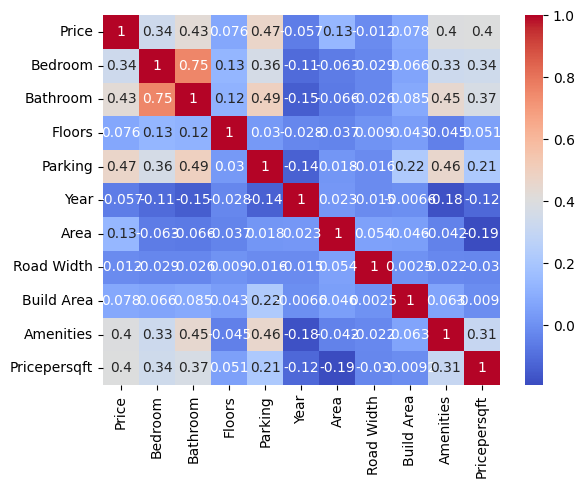

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# # histogram plots
# fig, axs = plt.subplots(X_1.shape[1], figsize=(5, 40))

# for i, column in enumerate(X_1.columns):
#     axs[i].hist(X_1[column])
#     axs[i].set_title(column)

# plt.show()

In [11]:
# for col in X_1.columns:
#     if X_1[col].dtype != object:  # plot only numeric columns
#         fig, ax = plt.subplots()
#         ax.boxplot(X_1[col])
#         ax.set_title(col)
#         plt.show()

# Data preparation pipeline

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
t = [('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols), ('num', MinMaxScaler(), numeric_cols)]
col_transform = ColumnTransformer(transformers=t)
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Address', 'City', 'Face', 'Road Type'], dtype='object')),
                                ('num', MinMaxScaler(),
                                 Index(['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Year', 'Area',
       'Road Width', 'Build Area', 'Amenities', 'Pricepersqft'],
      dtype='object'))])

In [13]:
print(categorical_cols)
print(numeric_cols)

Index(['Address', 'City', 'Face', 'Road Type'], dtype='object')
Index(['Bedroom', 'Bathroom', 'Floors', 'Parking', 'Year', 'Area',
       'Road Width', 'Build Area', 'Amenities', 'Pricepersqft'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_model(y, y_hat):
    r2 = r2_score(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)
    rmse = np.sqrt(mse)
    return r2, mae, rmse, mse

## Training

In [16]:
# from xgboost import XGBRegressor
# from sklearn.pipeline import Pipeline

# xgb = XGBRegressor()

# xgb_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb)])
# xgb_pipe.fit(X_train, y_train)
# y_pred_xgb = xgb_pipe.predict(X_test)
# print('xgb', evaluate_model(y_pred_xgb, y_test))
# print(xgb_pipe.score(X_test, y_test))

In [17]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# xgb = XGBRegressor()

# param_grid = {
#     'model__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.8],
#     'model__max_depth': [3, 4, 5, 6, 7, 8, 9],
#     'model__n_estimators': [50, 100, 200,150,300,350,500],
#     'model__reg_lambda': [0, 0.01, 0.1, 0.5, 0.8, 1, 1.2, 1.5,2,3,4,5,6,7,8,9, 10,]
# }
# xgb_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb)])
# grid_search = GridSearchCV(xgb_pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)


# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [18]:
# xgb_tuned = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.5)

# xgb_tuned_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb_tuned)])
# xgb_tuned_pipe.fit(X_train, y_train)
# y_pred_xgb_tuned = xgb_tuned_pipe.predict(X_test)
# print('xgb_tuned', evaluate_model(y_pred_xgb_tuned, y_test))
# print(xgb_tuned_pipe.score(X_test, y_test))

In [19]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
xgb_tuned = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, reg_lambda=0.1)

xgb_tuned_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb_tuned)])
xgb_tuned_pipe.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned_pipe.predict(X_test)
print('xgb_tuned', evaluate_model(y_pred_xgb_tuned, y_test))
print(xgb_tuned_pipe.score(X_test, y_test))

xgb_tuned (0.6781201780640798, 3303170.945612981, 17864683.54412974, 319146918131900.0)
0.829091921774911


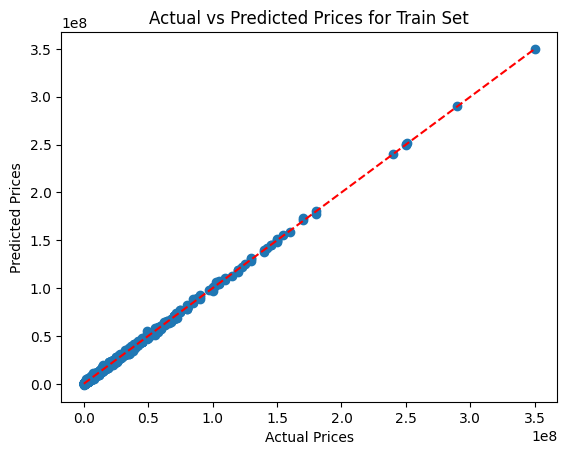

In [20]:
plt.scatter(y_train, xgb_tuned_pipe.predict(X_train))

# Add a diagonal line representing perfect predictions
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')

# Set axis labels and plot title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for Train Set')

# Show the plot
plt.show()

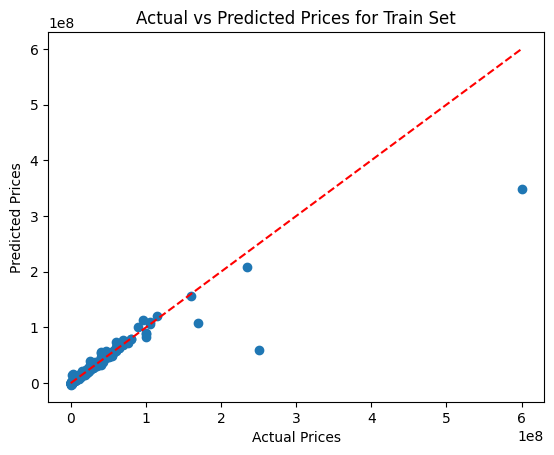

In [21]:
plt.scatter(y_test, y_pred_xgb_tuned)

# Add a diagonal line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')

# Set axis labels and plot title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for Train Set')

# Show the plot
plt.show()

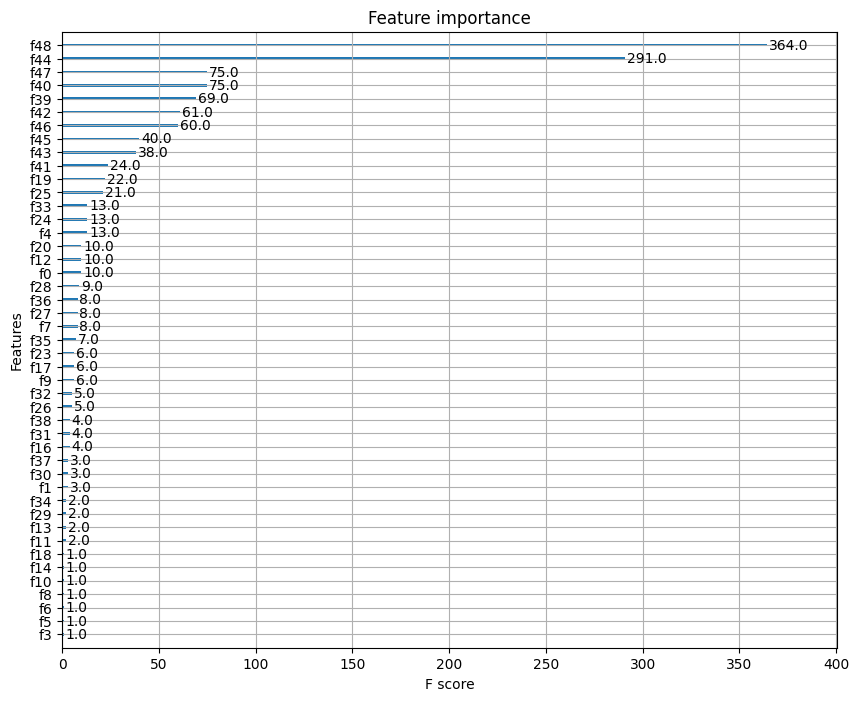

In [26]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_tuned, ax=ax)
plt.show()

In [22]:
# from joblib import dump

# dump(xgb_tuned_pipe, 'xgb_tuned_pipe.pkl')

In [23]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_pipe = Pipeline(steps=[('perp', col_transform), ('model', rf)])
# rf_pipe.fit(X_train, y_train)
# y_pred_rf = rf_pipe.predict(X_test)
# print('rf', evaluate_model(y_pred_rf, y_test))
# print(rf_pipe.score)

In [24]:
# from sklearn.linear_model import ElasticNet
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# pipe = Pipeline([
#     ('prep', col_transform),
#     ('model', ElasticNet())
# ])

# param_grid = {
#     'model__alpha': [0.01, 0.1, 1, 10],
#     'model__l1_ratio': [0.2, 0.5, 0.8]
# }

# grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)


In [25]:
# log_dir = "logs/fit/xgboost" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir)

# r2, mae, rmse, mse = evaluate_model(y_pred_xgb_tuned, y_test)
# with tf.summary.create_file_writer(log_dir).as_default():
#     tf.summary.scalar('r2', r2, step=1)
#     tf.summary.scalar('mae', mae, step=1)
#     tf.summary.scalar('rmse', rmse, step=1)
#     tf.summary.scalar('mse', mse, step=1)
